# Example to get energies (total, electronic, nuclear, heat of formation, orbital), charges, dipole, forces, density matrix.

In [10]:
import torch
import seqm
from seqm.seqm_functions.constants import Constants
from seqm.Molecule import Molecule
from seqm.ElectronicStructure import Electronic_Structure

torch.set_default_dtype(torch.float64)
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

NameError: name '_C' is not defined

In [ ]:
import re
import io
import os
import tempfile
import matplotlib.pyplot as plt
import matplotlib.image as mpim

import jonga

%matplotlib inline

In [ ]:
!pwd

/auto/nest/nest/u/fns/github/PYSEQM


In [ ]:
ct = jonga.CallTracer(srcmodflt='^seqm', fnmsub=('^seqm.', ''), grpflt='^[^\.]*')


In [ ]:
ct.start()

In [11]:
%%time

### create molecule object:
species = torch.as_tensor([[8,6,1,1],
                           [8,6,1,1],
                           [8,8,6,0]], # zero-padding for batching
                          dtype=torch.int64, device=device)

coordinates = torch.tensor([
                              [
                               [0.00,    0.00,    0.00],
                               [1.22,    0.00,    0.00],
                               [1.82,    0.94,    0.00],
                               [1.82,   -0.94,    0.00]
                              ],
                              [
                               [0.00,    0.00,    0.00],
                               [1.22,    0.00,    0.00],
                               [1.82,    0.94,    0.00],
                               [1.82,   -0.94,    0.00]
                              ],
                              [
                               [0.00,    0.00,    0.00],
                               [1.23,    0.00,    0.00],
                               [1.82,    0.94,    0.00],
                               [0.0,0.0,0.0]            # zero-padding for batching
                              ]
                            ], device=device)

const = Constants().to(device)

elements = [0]+sorted(set(species.reshape(-1).tolist()))

seqm_parameters = {
                   'method' : 'AM1',  # AM1, MNDO, PM#
                   'scf_eps' : 1.0e-6,  # unit eV, change of electric energy, as nuclear energy doesnt' change during SCF
                   'scf_converger' : [2,0.0], # converger used for scf loop
                                         # [0, 0.1], [0, alpha] constant mixing, P = alpha*P + (1.0-alpha)*Pnew
                                         # [1], adaptive mixing
                                         # [2], adaptive mixing, then pulay
                   'sp2' : [False, 1.0e-5],  # whether to use sp2 algorithm in scf loop,
                                            #[True, eps] or [False], eps for SP2 conve criteria
                   'elements' : elements, #[0,1,6,8],
                   'learned' : [], # learned parameters name list, e.g ['U_ss']
                   #'parameter_file_dir' : '../seqm/params/', # file directory for other required parameters
                   'pair_outer_cutoff' : 1.0e10, # consistent with the unit on coordinates
                   'eig' : True
                   }

molecules = seqm.Molecule.Molecule(const, seqm_parameters, coordinates, species).to(device)

### Create electronic structure driver:
esdriver = Electronic_Structure(seqm_parameters).to(device)

### Run esdriver on molecules:
esdriver(molecules)

NameError: name 'torch' is not defined

In [ ]:
Molecule

seqm.Molecule.Molecule

In [ ]:
ct.stop()

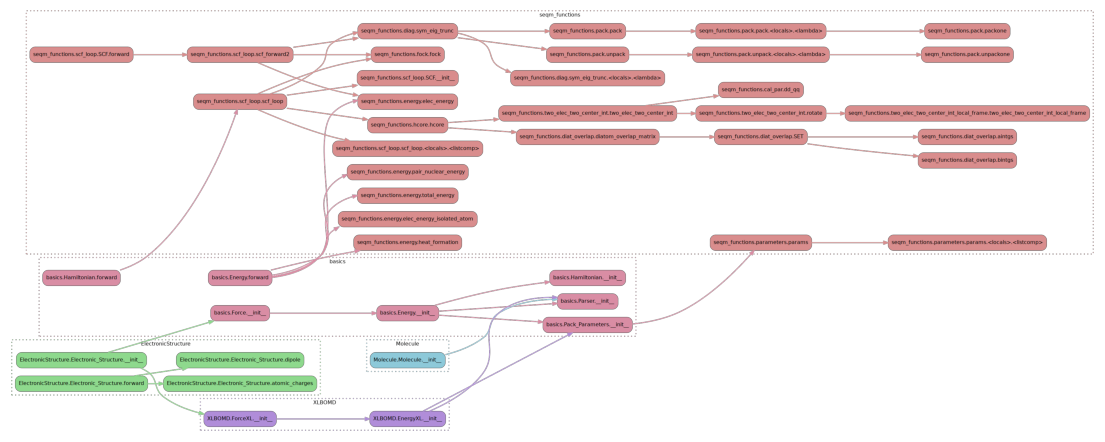

In [ ]:
fntfm = 'Vera Sans, DejaVu Sans, Liberation Sans, Arial, Helvetica, sans'
g = ct.graph(fntsz=12, fntfm=fntfm)
png = g.draw(format='png')
bio = io.BytesIO()
bio.write(png)
bio.seek(0)
img = mpim.imread(bio)


fig = plt.figure(figsize=(14,14))
axim = plt.imshow(img)
ax = plt.axis('off')
plt.savefig('Test1_SinglePointProp_FNS.png', dpi=900, bbox_inches='tight', pad_inches=0.0)
plt.show()
# plt.savefig('Test1_SinglePointProp_FNS.png', bbox_inches='tight')





In [ ]:
ct.fncts

{'Molecule.Molecule.__init__': [1, 0],
 'basics.Parser.__init__': [0, 3],
 'ElectronicStructure.Electronic_Structure.__init__': [2, 0],
 'basics.Force.__init__': [1, 1],
 'basics.Energy.__init__': [3, 1],
 'basics.Pack_Parameters.__init__': [2, 2],
 'seqm_functions.parameters.params': [8, 2],
 'seqm_functions.parameters.params.<locals>.<listcomp>': [0, 8],
 'basics.Hamiltonian.__init__': [0, 1],
 'XLBOMD.ForceXL.__init__': [1, 1],
 'XLBOMD.EnergyXL.__init__': [2, 1],
 'basics.Hamiltonian.forward': [1, 0],
 'seqm_functions.scf_loop.scf_loop': [5, 1],
 'seqm_functions.hcore.hcore': [2, 1],
 'seqm_functions.diat_overlap.diatom_overlap_matrix': [4, 1],
 'seqm_functions.diat_overlap.SET': [8, 4],
 'seqm_functions.diat_overlap.aintgs': [0, 4],
 'seqm_functions.diat_overlap.bintgs': [0, 4],
 'seqm_functions.two_elec_two_center_int.two_elec_two_center_int': [2, 1],
 'seqm_functions.cal_par.dd_qq': [0, 1],
 'seqm_functions.two_elec_two_center_int.rotate': [1, 1],
 'seqm_functions.two_elec_two_c

In [ ]:
!pwd

/auto/nest/nest/u/fns/github/PYSEQM


In [ ]:
fd, pth = tempfile.mkstemp(suffix='.png')
os.close(fd)

img = mpim.imread(pth)
fig = plt.figure(figsize=(16, 16))
axim = plt.imshow(img)
ax = plt.axis('off')
plt.show()



SyntaxError: not a PNG file (<string>)

In [ ]:
print(' Total Energy (eV):\n', molecules.Etot)
print('\n Electronic Energy (eV): ', molecules.Eelec)
print('\n Nuclear Energy (eV):\n', molecules.Enuc)
print('\n Heat of Formation (ev):\n', molecules.Hf)
print('\n HOMO-LUMO gap (eV):\n', molecules.e_gap)
print('\n Orbital energies (eV):\n', molecules.e_mo)
print('\n Charges:\n', molecules.q)
print('\n Dipole:\n', molecules.d)
print('\n Forces (eV/A):\n', molecules.force)

 Total Energy (eV):
 tensor([-475.5819, -475.5819, -759.2461], device='cuda:0')

 Electronic Energy (eV):  tensor([ -864.9940,  -864.9940, -1504.4581], device='cuda:0')

 Nuclear Energy (eV):
 tensor([389.4122, 389.4122, 745.2120], device='cuda:0')

 Heat of Formation (ev):
 tensor([-1.3620, -1.3620,  6.3444], device='cuda:0')

 HOMO-LUMO gap (eV):
 tensor([[11.5926],
        [11.5926],
        [ 9.3512]], device='cuda:0')

 Orbital energies (eV):
 tensor([[-39.2319, -25.0148, -17.1717, -16.2773, -14.6390, -10.7560,   0.8365,
           3.1526,   3.9792,   6.0949,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000],
        [-39.2319, -25.0148, -17.1717, -16.2773, -14.6390, -10.7560,   0.8365,
           3.1526,   3.9792,   6.0949,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000],
        [-46.6530, -35.1909, -24.5378, -20.3545, -20.2776, -15.5339, -11.1722,
         -11.1536,  -1.8024,  -0.0904,   2.2116,   6.4506,   0.0000,   0.0000,
           0.

In [ ]:
print('\n Density matrix:\n', molecules.dm)


 Density matrix:
 tensor([[[ 1.9076e+00, -2.7516e-01,  3.2645e-16,  0.0000e+00,  1.3504e-01,
          -2.8679e-01, -1.1850e-15,  0.0000e+00,  6.1922e-03,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  6.1922e-03,  0.0000e+00,  0.0000e+00,
           0.0000e+00],
         [-2.7516e-01,  1.1584e+00, -2.8622e-16,  0.0000e+00,  5.0980e-01,
          -7.8705e-01,  2.9303e-16,  0.0000e+00, -9.9623e-02,  0.0000e+00,
           0.0000e+00,  0.0000e+00, -9.9623e-02,  0.0000e+00,  0.0000e+00,
           0.0000e+00],
         [ 3.2645e-16, -2.8622e-16,  1.9075e+00,  0.0000e+00,  1.2383e-16,
           3.9240e-17,  3.0870e-01,  0.0000e+00, -2.0135e-01,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  2.0135e-01,  0.0000e+00,  0.0000e+00,
           0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.2991e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  9.5421e-01,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         

In [ ]:
molecules.coordinates

tensor([[[ 0.0000,  0.0000,  0.0000],
         [ 1.2200,  0.0000,  0.0000],
         [ 1.8200,  0.9400,  0.0000],
         [ 1.8200, -0.9400,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [ 1.2200,  0.0000,  0.0000],
         [ 1.8200,  0.9400,  0.0000],
         [ 1.8200, -0.9400,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [ 1.2300,  0.0000,  0.0000],
         [ 1.8200,  0.9400,  0.0000],
         [ 0.0000,  0.0000,  0.0000]]], device='cuda:0', requires_grad=True)